# Introduction

A data analysis project examining whether soccer referees are more likely to give red cards to dark skin toned players than light skin toned players

In [1]:
import pandas as pd
import numpy as np

In [2]:
#reading in data
soccer = pd.read_csv('CrowdstormingDataJuly1st.csv')
soccer.head(20)

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,...,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,...,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


In [3]:
# inspecting column names
print(soccer.columns)

Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')


In [4]:
soccer.shape

(146028, 28)

In [5]:
soccer['redCards'].value_counts()

0    144219
1      1784
2        25
Name: redCards, dtype: int64

In [6]:
soccer['games'].value_counts()

1     72562
2     25001
3     13623
4      8697
5      5985
6      4446
7      3332
8      2592
9      2003
10     1614
11     1224
12      975
13      781
14      626
15      497
16      415
17      291
18      255
19      204
20      158
21      135
22      115
23       95
25       77
24       76
26       48
27       39
28       31
30       24
29       21
31       18
32       17
33       10
34        9
37        7
35        5
36        4
41        4
40        3
44        2
38        2
39        2
46        1
42        1
47        1
Name: games, dtype: int64

In [7]:
soccer['player'].value_counts().sort_values(ascending=False)

 Juanfran                276
Djibril Cissé            202
John Arne Riise          197
Javier Saviola           196
Giorgios Karagounis      195
 Diego                   190
 Xavi                    188
 Hélder Postiga          183
 André Santos            182
Zlatan Ibrahimović       181
Rafael van der Vaart     181
 Simão                   180
Timmy Simons             177
Ian Harte                177
David Rozehnal           175
Nelson Valdez            175
Emre Belözoğlu           175
 Ángel                   174
Emanuel Pogatetz         174
 Iker Casillas           173
Shay Given               172
 Marchena                171
Anatoliy Tymoshchuk      170
Claudio Pizarro          170
Andreas Ivanschitz       169
Gabriel Tamaş            169
Mark Schwarzer           168
William Gallas           167
Ludovic Giuly            167
Aaron Hughes             166
                        ... 
Yannick Aguemon            3
Marc Vidal                 3
Stevy Nzambe               3
Johann Durand 

# Exploratory Analysis 

1. Position
2. IAT by country
3. Skin color with photos
4. Yellow vs Red
5. Impact of league

## Cards by Player Position

### Red Cards

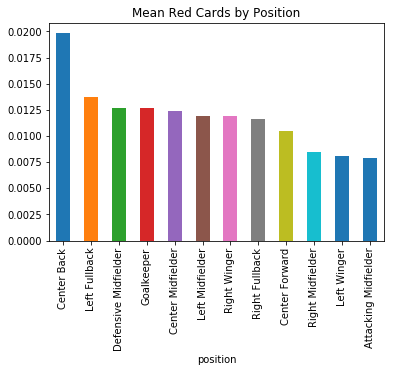

In [9]:
# position and red cards
soccer.groupby('position').mean()['redCards'].sort_values(ascending = False).plot(kind='bar', title='Mean Red Cards by Position')

The plot above makes sense intuitively. We would naturally expect defensive players to perform the highest risk tackles thereby increasing their chances of receiving a red card. Note that goalkeepers are ranked at position 4. This is interesting and makes sense since most tackles performed by goalkeepers are last-man challenges, which in most cases result in a red card

### Yellow Cards

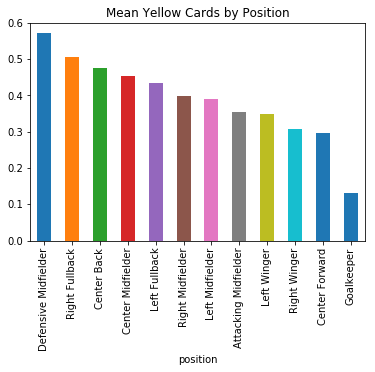

In [10]:
soccer.groupby('position').mean()['yellowCards'].sort_values(ascending = False).plot(kind='bar', title='Mean Yellow Cards by Position')

Note how the positions have changed for yellow cards. Midfielders and Defenders still receive most cards but goalkeeper is now in last position

### Double Yellow Cards

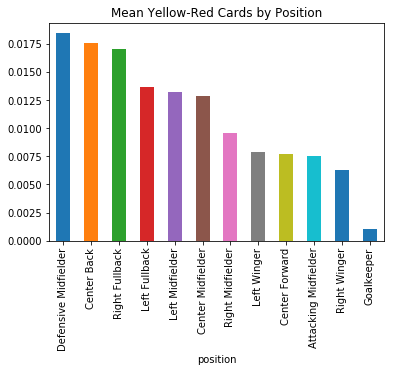

In [11]:
soccer.groupby('position').mean()['yellowReds'].sort_values(ascending = False).plot(kind='bar', title='Mean Yellow-Red Cards by Position')

Not very different from the mean yellow-cards distribution, with goalkeepers naturally receiving very few double-yellow cards

## Red Cards and MeanIAT

MeanIAT - Referee Country's Mean Implicit Bias

In [12]:
soccer.groupby('refCountry').mean().sort_values(by='redCards', ascending = False)

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
refCountry,,,,,,,,,,,,,,,,,,,
150,180.166667,73.500000,1.666667,0.500000,0.833333,0.333333,0.166667,0.166667,0.000000,0.166667,0.166667,0.166667,2150.000000,0.247159,20.0,2.373498e-02,-0.136364,22.0,0.116771
66,179.110312,74.741935,2.189448,1.100719,0.405276,0.683453,0.378897,0.434053,0.016787,0.043165,0.300641,0.332692,1369.733813,0.347543,371.0,1.162938e-03,0.706806,382.0,0.005957
133,181.041667,75.958333,1.000000,0.916667,0.000000,0.083333,0.125000,0.083333,0.000000,0.041667,0.181818,0.193182,1355.000000,0.341972,839.0,5.352243e-04,0.029919,869.0,0.002406
97,182.508772,76.264151,1.210526,0.701754,0.210526,0.298246,0.315789,0.122807,0.000000,0.035088,0.265000,0.330000,2225.122807,0.349232,4489.0,9.390072e-05,0.380309,4662.0,0.000396
17,180.800000,75.200000,1.033333,0.833333,0.100000,0.100000,0.266667,0.133333,0.000000,0.033333,0.321429,0.339286,20.000000,0.343632,72.0,7.074600e-03,0.368421,76.0,0.026651
49,178.999138,74.945217,2.900000,1.241379,0.747414,0.911207,0.402586,0.529310,0.012931,0.028448,0.262776,0.282064,1415.234483,0.379422,1038.0,4.026680e-04,0.632988,1158.0,0.002096
47,180.718750,76.059091,1.593750,0.875000,0.299107,0.419643,0.209821,0.165179,0.004464,0.026786,0.298128,0.310160,2252.544643,0.398503,254.0,1.681818e-03,0.697417,271.0,0.008707
53,181.260504,75.745763,1.067227,0.739496,0.075630,0.252101,0.210084,0.092437,0.008403,0.025210,0.197619,0.242857,1688.621849,0.375592,108.0,3.382329e-03,0.830357,112.0,0.014868
73,180.737307,75.506667,1.622517,0.825607,0.273731,0.523179,0.236203,0.242826,0.008830,0.024283,0.313260,0.354015,1667.337748,0.362015,130.0,3.005738e-03,0.588235,136.0,0.017503


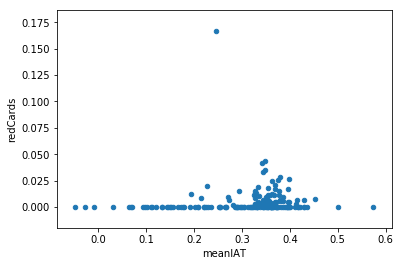

In [13]:
soccer.groupby('refCountry').mean().sort_values(by='redCards', ascending = False)[['redCards', 'meanIAT']].plot(x = 'meanIAT', y = 'redCards', kind='scatter')

There does not seem to be a linear relationship between red cards and a country's mean implicit bias. However, there are more red cards given out on average for countries with a higher mean implicit bias

## Leagues and Red Cards

In [14]:
soccer

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,...,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,...,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


In [15]:
league_group = soccer.groupby('leagueCountry').mean()
league_group[['yellowCards', 'yellowReds', 'redCards']].sort_values(by='redCards', ascending=False)

,yellowCards,yellowReds,redCards
leagueCountry,,,
France,0.383606,0.011534,0.016492
Spain,0.523533,0.019264,0.015918
England,0.343559,0.007899,0.011072
Germany,0.323787,0.008945,0.008769


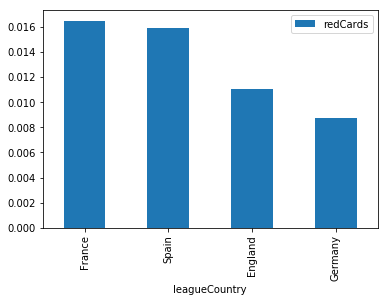

In [18]:
league_group[['redCards']].sort_values(by='redCards', ascending=False).plot(kind='bar')

## Red Cards by Skin Tone

In [19]:
rater1_group = soccer.groupby('rater1').mean()
rater1_group.sort_values(by='redCards', ascending=False)[['redCards', 'yellowCards', 'yellowReds']]

,redCards,yellowCards,yellowReds
rater1,,,
1.00,0.015025,0.371552,0.013547
0.75,0.013683,0.365961,0.011262
0.25,0.013613,0.432575,0.013201
0.50,0.012946,0.373502,0.011244
0.00,0.011391,0.387652,0.011191


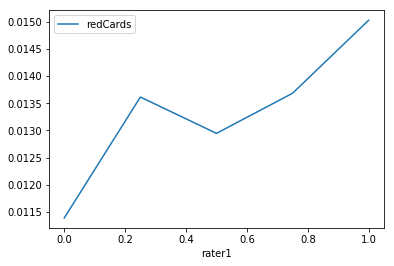

In [20]:
rater1_group[['redCards']].plot(kind='line')

In [21]:
rater2_group = soccer.groupby('rater2').mean()
rater2_group.sort_values(by='redCards', ascending=False)[['redCards', 'yellowCards', 'yellowReds']]

,redCards,yellowCards,yellowReds
rater2,,,
1.00,0.014299,0.364567,0.012980
0.50,0.013755,0.390198,0.012174
0.25,0.013349,0.426164,0.012694
0.75,0.012708,0.352295,0.010691
0.00,0.011033,0.382224,0.011145


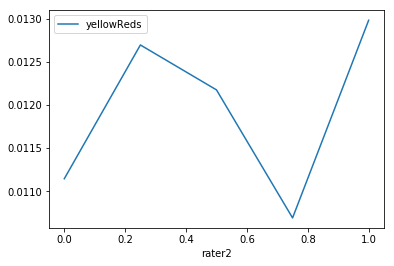

In [22]:
rater2_group[['yellowReds']].plot(kind='line')

## Regression

In [23]:
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

### Yellow Cards

1. Compute yellow cards per game
2. Group by player (Aggregrate mean)
3. Run Linear Regression

In [24]:
# create rating average column
soccer['ratingAvg'] = (soccer['rater1'] + soccer['rater2'])/2
soccer

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,ratingAvg
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,NaN
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,NaN
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,NaN
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.250
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000


In [25]:
# drop na values in ratingAvg column
soccer = soccer.dropna(subset = ['ratingAvg'])
soccer

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,ratingAvg
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.250
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000
10,antonio-rukavina,Antonio Rukavina,Real Valladolid,Spain,26.01.1984,177.0,74.0,Right Fullback,2,2,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000
11,ashkan-dejagah,Ashkan Dejagah,Fulham FC,England,05.07.1986,181.0,74.0,Left Winger,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.500
12,benedikt-hoewedes,Benedikt Höwedes,FC Schalke 04,Germany,29.02.1988,187.0,80.0,Center Back,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000


In [26]:
# one hot encoding for position
soccer = pd.get_dummies(soccer, columns=['position'])
soccer

,playerShort,player,club,leagueCountry,birthday,height,weight,games,victories,ties,...,position_Center Forward,position_Center Midfielder,position_Defensive Midfielder,position_Goalkeeper,position_Left Fullback,position_Left Midfielder,position_Left Winger,position_Right Fullback,position_Right Midfielder,position_Right Winger
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
10,antonio-rukavina,Antonio Rukavina,Real Valladolid,Spain,26.01.1984,177.0,74.0,2,2,0,...,0,0,0,0,0,0,0,1,0,0
11,ashkan-dejagah,Ashkan Dejagah,Fulham FC,England,05.07.1986,181.0,74.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
12,benedikt-hoewedes,Benedikt Höwedes,FC Schalke 04,Germany,29.02.1988,187.0,80.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# create columns for yellow and red cards per game
soccer['yellowCardsPerGame'] = soccer['yellowCards'] / soccer['games']
soccer['redCardsPerGame'] = soccer['redCards']/soccer['games']

In [28]:
# group by player, aggregate the mean
player_group = soccer.groupby('player').mean()
player_group

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,...,position_Defensive Midfielder,position_Goalkeeper,position_Left Fullback,position_Left Midfielder,position_Left Winger,position_Right Fullback,position_Right Midfielder,position_Right Winger,yellowCardsPerGame,redCardsPerGame
player,,,,,,,,,,,,,,,,,,,,,
Adriano,172.000000,67.000000,3.453704,2.120370,0.546296,0.787037,0.305556,0.537037,0.009259,0.027778,...,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.108056,0.002050
Adrián,184.228070,75.210526,2.833333,1.359649,0.640351,0.833333,0.526316,0.166667,0.000000,0.000000,...,0.0,0.245614,0.000000,0.0,0.0,0.0,0.0,0.0,0.085717,0.000000
Adrián Colunga,171.000000,69.000000,3.787234,1.127660,0.914894,1.744681,0.829787,0.468085,0.021277,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.154290,0.000000
Aduriz,182.000000,78.000000,5.111111,1.984127,1.301587,1.825397,1.666667,1.079365,0.047619,0.063492,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.197729,0.006126
Adán,190.000000,88.000000,1.419355,0.709677,0.193548,0.516129,0.000000,0.032258,0.000000,0.032258,...,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.032258,0.006452
Agirretxe,187.000000,77.000000,4.444444,1.733333,1.377778,1.333333,1.155556,0.177778,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.031817,0.000000
Albelda,181.000000,77.000000,3.816327,1.986395,0.945578,0.884354,0.074830,1.340136,0.020408,0.040816,...,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.313821,0.005511
Alberto Botía,186.000000,82.000000,3.800000,1.133333,1.111111,1.555556,0.088889,1.533333,0.000000,0.066667,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.325326,0.030247
Alberto Perea,177.000000,68.000000,1.545455,0.454545,0.272727,0.818182,0.090909,0.090909,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.000000


In [29]:
# target column for yellow cards
Y = player_group['yellowCardsPerGame']
Y

player
 Adriano               0.108056
 Adrián                0.085717
 Adrián Colunga        0.154290
 Aduriz                0.197729
 Adán                  0.032258
 Agirretxe             0.031817
 Albelda               0.313821
 Alberto Botía         0.325326
 Alberto Perea         0.090909
 Alex                  0.134170
 Alexis                0.276314
 Alfaro                0.127731
 Amaya                 0.294097
 Amorebieta            0.266566
 Ander Herrera         0.257398
 Anderson              0.095774
 Anderson Conceição    0.083333
 Andre Luiz            0.191238
 André Santos          0.199248
 Ansotegi              0.145214
 Anthony Lopes         0.055556
 Antonio López         0.118789
 Apoño                 0.283364
 Aranda                0.155455
 Aranzubía             0.129902
 Arbeloa               0.155821
 Arizmendi             0.108219
 Arribas               0.312585
 Arrizabalaga          0.071429
 Asenjo                0.033598
                         ...   
Y

In [30]:
# viewing column names
player_group.columns

Index(['height', 'weight', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'rater1', 'rater2', 'refNum',
       'refCountry', 'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp',
       'ratingAvg', 'position_Attacking Midfielder', 'position_Center Back',
       'position_Center Forward', 'position_Center Midfielder',
       'position_Defensive Midfielder', 'position_Goalkeeper',
       'position_Left Fullback', 'position_Left Midfielder',
       'position_Left Winger', 'position_Right Fullback',
       'position_Right Midfielder', 'position_Right Winger',
       'yellowCardsPerGame', 'redCardsPerGame'],
      dtype='object')

In [31]:
# specifiying features
feature_cols = ['games','rater1', 'rater2', 'meanIAT', 'position_Attacking Midfielder', 'position_Center Back',
       'position_Center Forward', 'position_Center Midfielder',
       'position_Defensive Midfielder', 'position_Goalkeeper',
       'position_Left Fullback', 'position_Left Midfielder',
       'position_Left Winger', 'position_Right Fullback',
       'position_Right Midfielder', 'position_Right Winger']

In [32]:
# creating feature matrix
X = player_group.loc[:, feature_cols]
X

,games,rater1,rater2,meanIAT,position_Attacking Midfielder,position_Center Back,position_Center Forward,position_Center Midfielder,position_Defensive Midfielder,position_Goalkeeper,position_Left Fullback,position_Left Midfielder,position_Left Winger,position_Right Fullback,position_Right Midfielder,position_Right Winger
player,,,,,,,,,,,,,,,,
Adriano,3.453704,0.250000,0.250000,0.358428,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
Adrián,2.833333,0.250000,0.061404,0.360203,0.0,0.0,0.754386,0.000000,0.0,0.245614,0.000000,0.0,0.0,0.0,0.0,0.0
Adrián Colunga,3.787234,0.250000,0.250000,0.365679,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Aduriz,5.111111,0.250000,0.250000,0.363666,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Adán,1.419355,0.000000,0.000000,0.369184,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Agirretxe,4.444444,0.000000,0.000000,0.370791,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Albelda,3.816327,0.250000,0.250000,0.356769,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Alberto Botía,3.800000,0.000000,0.250000,0.361793,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Alberto Perea,1.545455,0.250000,0.250000,0.369894,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [33]:
# instantiate the model
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# fit the model
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
# print coefficients
coeffs = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['feature', 'estimatedCoefficients'])
coeffs

,feature,estimatedCoefficients
0,games,0.000477
1,rater1,-0.000307
2,rater2,0.001936
3,meanIAT,1.553252
4,position_Attacking Midfielder,-0.014420
5,position_Center Back,0.026834
6,position_Center Forward,-0.036355
7,position_Center Midfielder,0.009267
8,position_Defensive Midfielder,0.040726
9,position_Goalkeeper,-0.088663


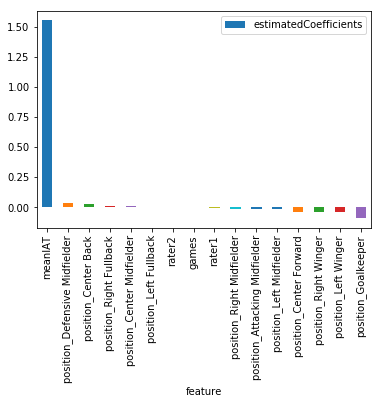

In [36]:
# plot coefficients
coeffs_sorted = coeffs.sort_values(by='estimatedCoefficients', ascending=False)
coeffs_sorted.plot(kind='bar', x = 'feature', y='estimatedCoefficients')

`meanIAT` seems to have the biggest impact on yellow cards received per game

### Red Cards

Same procedure as yellow cards

In [37]:
# view player groups
player_group

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,...,position_Defensive Midfielder,position_Goalkeeper,position_Left Fullback,position_Left Midfielder,position_Left Winger,position_Right Fullback,position_Right Midfielder,position_Right Winger,yellowCardsPerGame,redCardsPerGame
player,,,,,,,,,,,,,,,,,,,,,
Adriano,172.000000,67.000000,3.453704,2.120370,0.546296,0.787037,0.305556,0.537037,0.009259,0.027778,...,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.108056,0.002050
Adrián,184.228070,75.210526,2.833333,1.359649,0.640351,0.833333,0.526316,0.166667,0.000000,0.000000,...,0.0,0.245614,0.000000,0.0,0.0,0.0,0.0,0.0,0.085717,0.000000
Adrián Colunga,171.000000,69.000000,3.787234,1.127660,0.914894,1.744681,0.829787,0.468085,0.021277,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.154290,0.000000
Aduriz,182.000000,78.000000,5.111111,1.984127,1.301587,1.825397,1.666667,1.079365,0.047619,0.063492,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.197729,0.006126
Adán,190.000000,88.000000,1.419355,0.709677,0.193548,0.516129,0.000000,0.032258,0.000000,0.032258,...,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.032258,0.006452
Agirretxe,187.000000,77.000000,4.444444,1.733333,1.377778,1.333333,1.155556,0.177778,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.031817,0.000000
Albelda,181.000000,77.000000,3.816327,1.986395,0.945578,0.884354,0.074830,1.340136,0.020408,0.040816,...,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.313821,0.005511
Alberto Botía,186.000000,82.000000,3.800000,1.133333,1.111111,1.555556,0.088889,1.533333,0.000000,0.066667,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.325326,0.030247
Alberto Perea,177.000000,68.000000,1.545455,0.454545,0.272727,0.818182,0.090909,0.090909,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.000000


In [38]:
# target column for red cards per game
Y2 = player_group['redCardsPerGame']
Y2

player
 Adriano               0.002050
 Adrián                0.000000
 Adrián Colunga        0.000000
 Aduriz                0.006126
 Adán                  0.006452
 Agirretxe             0.000000
 Albelda               0.005511
 Alberto Botía         0.030247
 Alberto Perea         0.000000
 Alex                  0.003049
 Alexis                0.013716
 Alfaro                0.000000
 Amaya                 0.005208
 Amorebieta            0.014580
 Ander Herrera         0.005829
 Anderson              0.000000
 Anderson Conceição    0.000000
 Andre Luiz            0.012202
 André Santos          0.005495
 Ansotegi              0.000000
 Anthony Lopes         0.000000
 Antonio López         0.004118
 Apoño                 0.023256
 Aranda                0.016949
 Aranzubía             0.005238
 Arbeloa               0.000000
 Arizmendi             0.000000
 Arribas               0.013158
 Arrizabalaga          0.000000
 Asenjo                0.000000
                         ...   
Y

In [39]:
# instantiate the model
lm2 = LinearRegression()
lm2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
# fit the model
lm2.fit(X, Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# print coefficients
coeffs2 = pd.DataFrame(list(zip(X.columns, lm2.coef_)), columns=['feature', 'estimatedCoefficients'])
coeffs2

,feature,estimatedCoefficients
0,games,-0.000108
1,rater1,0.003649
2,rater2,-0.001679
3,meanIAT,0.001244
4,position_Attacking Midfielder,-0.003945
5,position_Center Back,0.000062
6,position_Center Forward,-0.003173
7,position_Center Midfielder,-0.003249
8,position_Defensive Midfielder,-0.002431
9,position_Goalkeeper,-0.001242


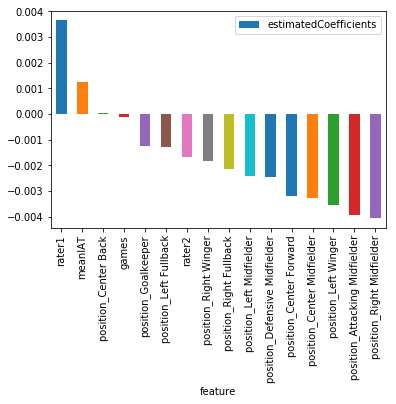

In [42]:
# plot coefficients
coeffs2_sorted = coeffs2.sort_values(by='estimatedCoefficients', ascending=False)
coeffs2_sorted.plot(kind='bar', x = 'feature', y='estimatedCoefficients')

`rater1` and `meanIAT` seem to have the biggest impact on red cards received per game